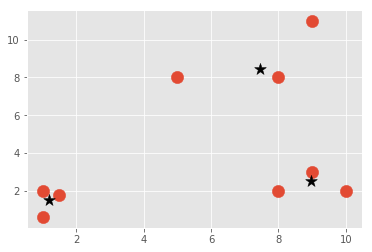

In [11]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],
              [8,2],
              [10,2],
              [9,3],])

##plt.scatter(X[:,0], X[:,1], s=150)
##plt.show()

colors = 10*["g","r","c","b","k"]

class Mean_Shift:
    def __init__(self, radius=None, radius_norm_step = 100):
        self.radius = radius
        self.radius_norm_step = radius_norm_step

    def fit(self, data):
        if self.radius == None:
            all_data_centroid = np.average(data, axis=0)
            all_data_norm = np.linalg.norm(all_data_centroid)
            self.radius = all_data_norm / self.radius_norm_step

        centroids = {}

        for i in range(len(data)):
            centroids[i] = data[i]
        
        while True:
            new_centroids = []
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]
                
                weights = [i for i in range(self.radius_norm_step)][::-1]
                
                for featureset in data:
                    distance = np.linalg.norm(featureset-centroid)
                    if distance == 0:
                        distance = 0.000000000001
                    weight_index = int(distance/self.radius)
                    if weight_index > self.radius_norm_step -1:
                        weight_index = self.radius_norm_step-1
                    to_add = (weights[weight_index]**2)*[featureset]
                    in_bandwidth += to_add
                    

                new_centroid = np.average(in_bandwidth,axis=0)
                new_centroids.append(tuple(new_centroid))

            uniques = sorted(list(set(new_centroids)))
            
            to_pop = []
            
            for i in uniques:
                for ii in uniques:
                    if i == ii:
                        pass
                    elif np.linalg.norm(np.array(i)-np.array(ii)) <= self.radius:
                        to_pop.append(ii)
                        break
            
            for i in to_pop:
                try:
                    uniques.remove(i)
                except:
                    pass

            prev_centroids = dict(centroids)

            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])

            optimized = True

            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False
                if not optimized:
                    break
                
            if optimized:
                break

        self.centroids = centroids



clf = Mean_Shift()
clf.fit(X)

centroids = clf.centroids

plt.scatter(X[:,0], X[:,1], s=150)

for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color='k', marker='*', s=150)

plt.show()

0.0140312703825
{0: array([-2.24071984,  5.47964538]), 1: array([-1.61871093, -8.46673749]), 2: array([ 0.97622085, -6.29716876]), 3: array([ 6.08956904, -1.08024203]), 4: array([ 6.5141823 ,  0.08066177]), 5: array([ 7.42689918,  0.47240346]), 6: array([ 8.43547764,  2.31507574]), 7: array([ 8.44194544,  2.28438182])}


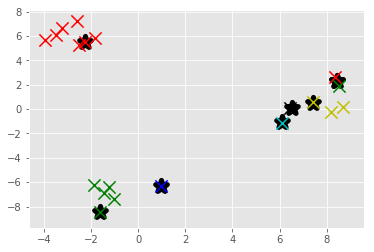

In [14]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.datasets.samples_generator import make_blobs

style.use('ggplot')

X, y = make_blobs(n_samples=20, centers=3, n_features=2)
##X = np.array([[1, 2],
##              [1.5, 1.8],
##              [5, 8],
##              [8, 8],
##              [1, 0.6],
##              [9, 11],
##              [8, 2],
##              [10, 2],
##              [9, 3]])


##plt.scatter(X[:, 0],X[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
##plt.show()

'''
1. Start at every datapoint as a cluster center

2. take mean of radius around cluster, setting that as new cluster center

3. Repeat #2 until convergence.

'''



class Mean_Shift:
    def __init__(self, radius = None, radius_norm_step = 100):
        self.radius = radius
        self.radius_norm_step = radius_norm_step
    
    def fit(self,data):

        if self.radius == None:
            all_data_centroid = np.average(data,axis=0)
            all_data_norm = np.linalg.norm(all_data_centroid)
            self.radius = all_data_norm/self.radius_norm_step
            print(self.radius)

        centroids = {}

        for i in range(len(data)):
            centroids[i] = data[i]

        weights = [i for i in range(self.radius_norm_step)][::-1]    
        while True:
            new_centroids = []
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]
                
                for featureset in data:

                    distance = np.linalg.norm(featureset-centroid)
                    if distance == 0:
                        distance = 0.00000000001
                    weight_index = int(distance/self.radius)
                    if weight_index > self.radius_norm_step-1:
                        weight_index = self.radius_norm_step-1

                    to_add = (weights[weight_index]**2)*[featureset]
                    in_bandwidth +=to_add

                new_centroid = np.average(in_bandwidth,axis=0)
                new_centroids.append(tuple(new_centroid))

            uniques = sorted(list(set(new_centroids)))

            to_pop = []

            for i in uniques:
                for ii in [i for i in uniques]:
                    if i == ii:
                        pass
                    elif np.linalg.norm(np.array(i)-np.array(ii)) <= self.radius:
                        #print(np.array(i), np.array(ii))
                        to_pop.append(ii)
                        break

            for i in to_pop:
                try:
                    uniques.remove(i)
                except:
                    pass

            prev_centroids = dict(centroids)
            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])

            optimized = True

            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False

            if optimized:
                break
            
        self.centroids = centroids
        self.classifications = {}

        for i in range(len(self.centroids)):
            self.classifications[i] = []
            
        for featureset in data:
            #compare distance to either centroid
            distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
            #print(distances)
            classification = (distances.index(min(distances)))

            # featureset that belongs to that cluster
            self.classifications[classification].append(featureset)


    def predict(self,data):
        #compare distance to either centroid
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = (distances.index(min(distances)))
        return classification



clf = Mean_Shift()
clf.fit(X)

centroids = clf.centroids
print(centroids)

colors = 10*['r','g','b','c','k','y']

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0],featureset[1], marker = "x", color=color, s=150, linewidths = 5, zorder = 10)

for c in centroids:
    plt.scatter(centroids[c][0],centroids[c][1], color='k', marker = "*", s=150, linewidths = 5)

plt.show()

NameError: name 'centers' is not defined